In [83]:
#pip install seaborn

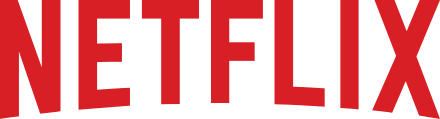

In [84]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import plotly.io as pio
pio.renderers.default='notebook'
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [85]:
netflix_overall = pd.read_csv("netflix_titles.csv")
netflix_overall.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [86]:
netflix_overall.release_year.unique()

array([2020, 2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015,
       2010, 2005, 2013, 2012, 2006, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       2021, 1973, 1967, 1960, 1981, 1958, 1976, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1925, 1942, 1969, 1955, 1963,
       1964, 1954, 1970, 1944, 1947, 1959, 1943], dtype=int64)

In [87]:
netflix_overall.listed_in.unique()

array(['International TV Shows, TV Dramas, TV Sci-Fi & Fantasy',
       'Dramas, International Movies',
       'Horror Movies, International Movies',
       'Action & Adventure, Independent Movies, Sci-Fi & Fantasy',
       'Dramas', 'International TV Shows, TV Dramas, TV Mysteries',
       'Horror Movies, International Movies, Thrillers',
       'Dramas, Thrillers',
       'Crime TV Shows, International TV Shows, TV Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Documentaries, International Movies, Sports Movies',
       'Independent Movies, Sci-Fi & Fantasy, Thrillers',
       'Dramas, International Movies, Thrillers',
       'International TV Shows, TV Dramas',
       'Comedies, Dramas, Independent Movies', 'Sports Movies',
       'Dramas, Independent Movies, International Movies',
       'Action & Adventure, Dramas, International Movies',
       'Anime Series, International TV Shows', 'Documentaries',
       'Reality TV', 'Documentaries, International

## TV Show vs Movie

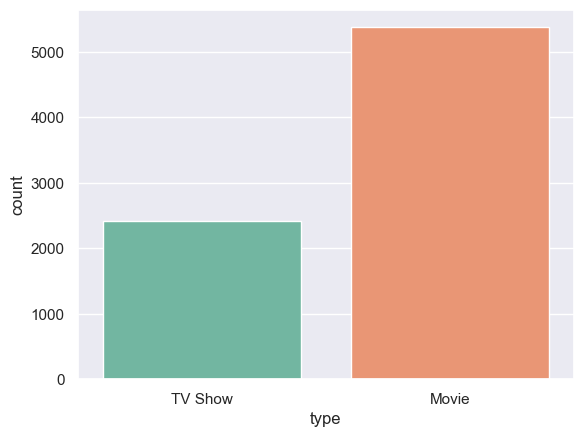

In [88]:
netflix_shows=netflix_overall[netflix_overall['type']=='TV Show']
netflix_movies=netflix_overall[netflix_overall['type']=='Movie']

sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=netflix_overall, hue='type', palette="Set2")

## Monthly Content Update over Years 
https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py

In [89]:
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December'][::-1]

monthly_content = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
monthly_content

year       2008  2013  2014  2015  2016  2017  2018  2019  2020  2021
month                                                                
December    0.0   0.0   1.0   7.0  44.0  39.0  64.0  50.0  74.0   0.0
November    0.0   0.0   3.0   2.0  18.0  31.0  41.0  77.0  55.0   0.0
October     0.0   2.0   0.0   5.0  18.0  32.0  46.0  73.0  56.0   0.0
September   0.0   1.0   0.0   1.0  19.0  33.0  44.0  44.0  62.0   0.0
August      0.0   1.0   0.0   0.0  17.0  38.0  34.0  53.0  61.0   0.0
July        0.0   0.0   0.0   3.0  10.0  34.0  30.0  67.0  53.0   0.0
June        0.0   0.0   0.0   3.0   8.0  30.0  28.0  48.0  48.0   0.0
May         0.0   0.0   0.0   2.0   4.0  25.0  28.0  49.0  64.0   0.0
April       0.0   0.0   1.0   4.0   8.0  29.0  31.0  50.0  58.0   0.0
March       0.0   1.0   0.0   2.0   3.0  38.0  38.0  60.0  56.0   0.0
February    1.0   0.0   1.0   1.0   7.0  18.0  24.0  46.0  46.0   0.0
January     0.0   0.0   0.0   0.0  29.0  14.0  22.0  39.0  64.0  29.0

In [90]:
monthly_content.to_numpy()

array([[ 0.,  0.,  1.,  7., 44., 39., 64., 50., 74.,  0.],
       [ 0.,  0.,  3.,  2., 18., 31., 41., 77., 55.,  0.],
       [ 0.,  2.,  0.,  5., 18., 32., 46., 73., 56.,  0.],
       [ 0.,  1.,  0.,  1., 19., 33., 44., 44., 62.,  0.],
       [ 0.,  1.,  0.,  0., 17., 38., 34., 53., 61.,  0.],
       [ 0.,  0.,  0.,  3., 10., 34., 30., 67., 53.,  0.],
       [ 0.,  0.,  0.,  3.,  8., 30., 28., 48., 48.,  0.],
       [ 0.,  0.,  0.,  2.,  4., 25., 28., 49., 64.,  0.],
       [ 0.,  0.,  1.,  4.,  8., 29., 31., 50., 58.,  0.],
       [ 0.,  1.,  0.,  2.,  3., 38., 38., 60., 56.,  0.],
       [ 1.,  0.,  1.,  1.,  7., 18., 24., 46., 46.,  0.],
       [ 0.,  0.,  0.,  0., 29., 14., 22., 39., 64., 29.]])

In [91]:
monthly_content.shape

(12, 10)

In [92]:
range(monthly_content.shape[1])

range(0, 10)

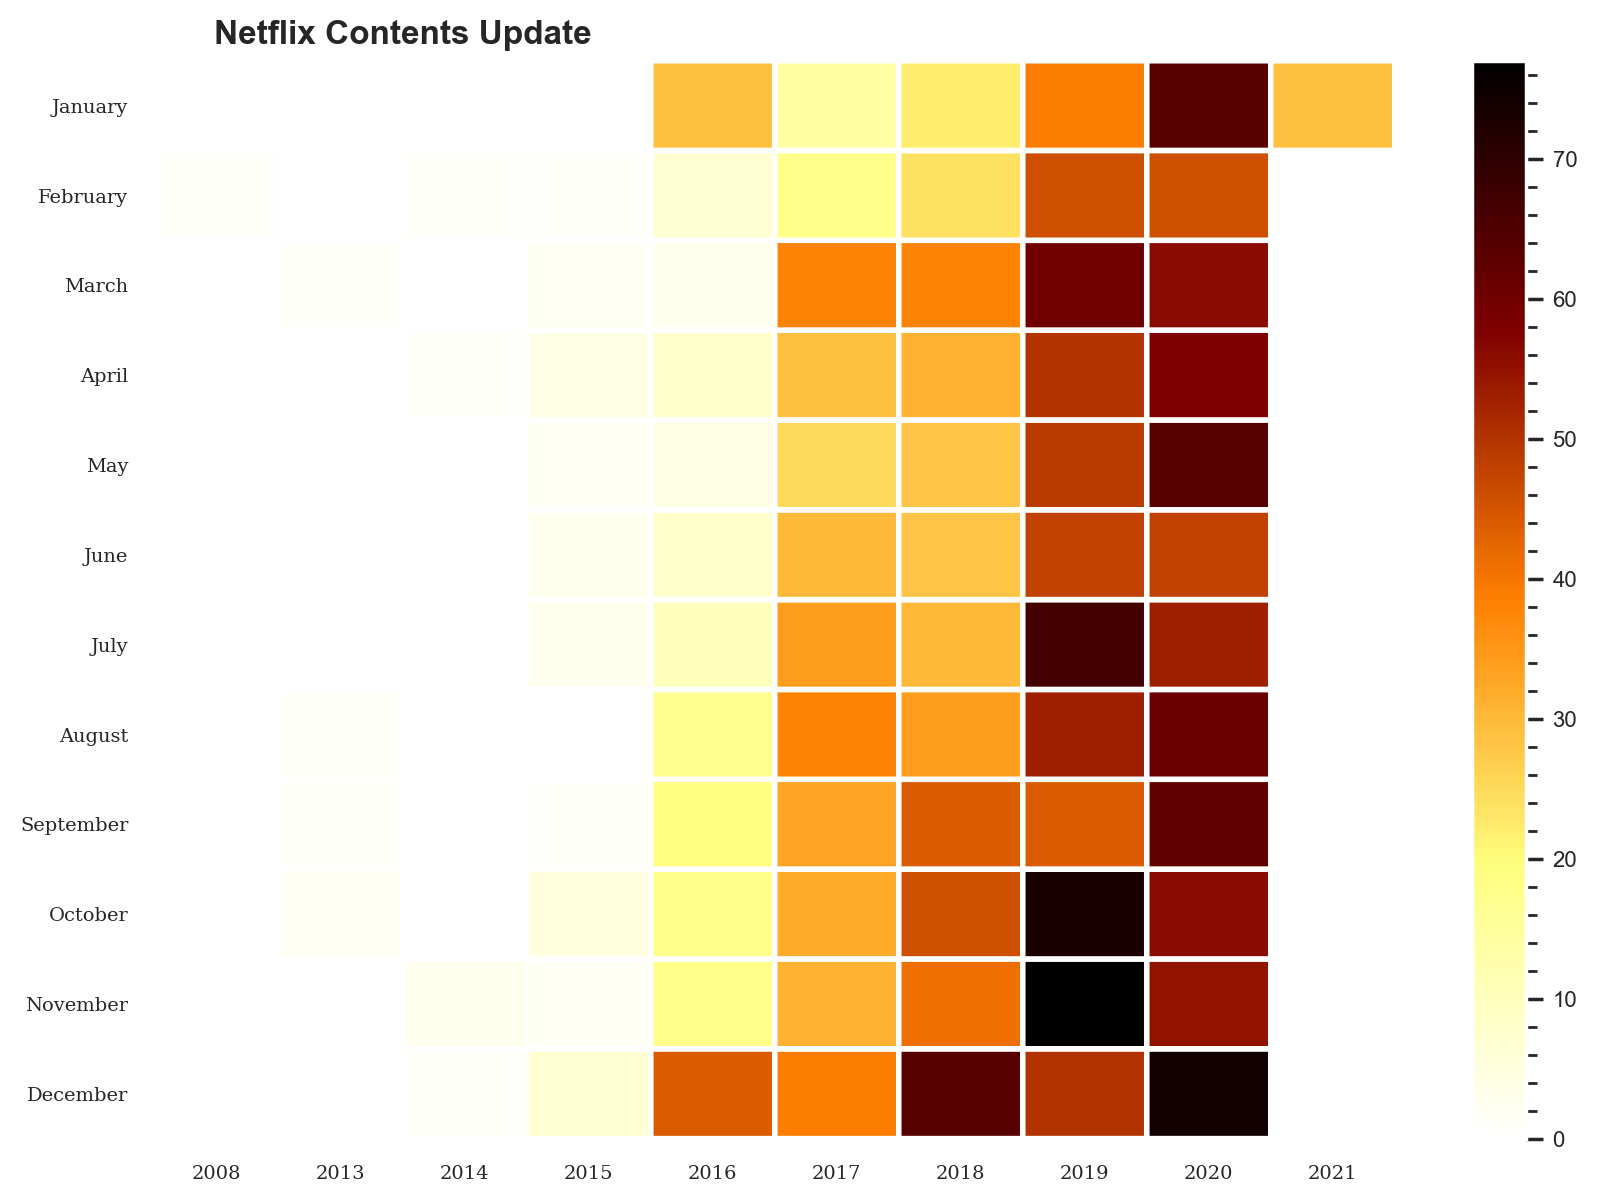

In [93]:
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(monthly_content, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap

plt.xticks(np.arange(0.5, len(monthly_content.columns), 1), monthly_content.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(monthly_content.index), 1), monthly_content.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()


plt.show()

### Text properties and layout
https://matplotlib.org/stable/users/explain/text/text_props.html

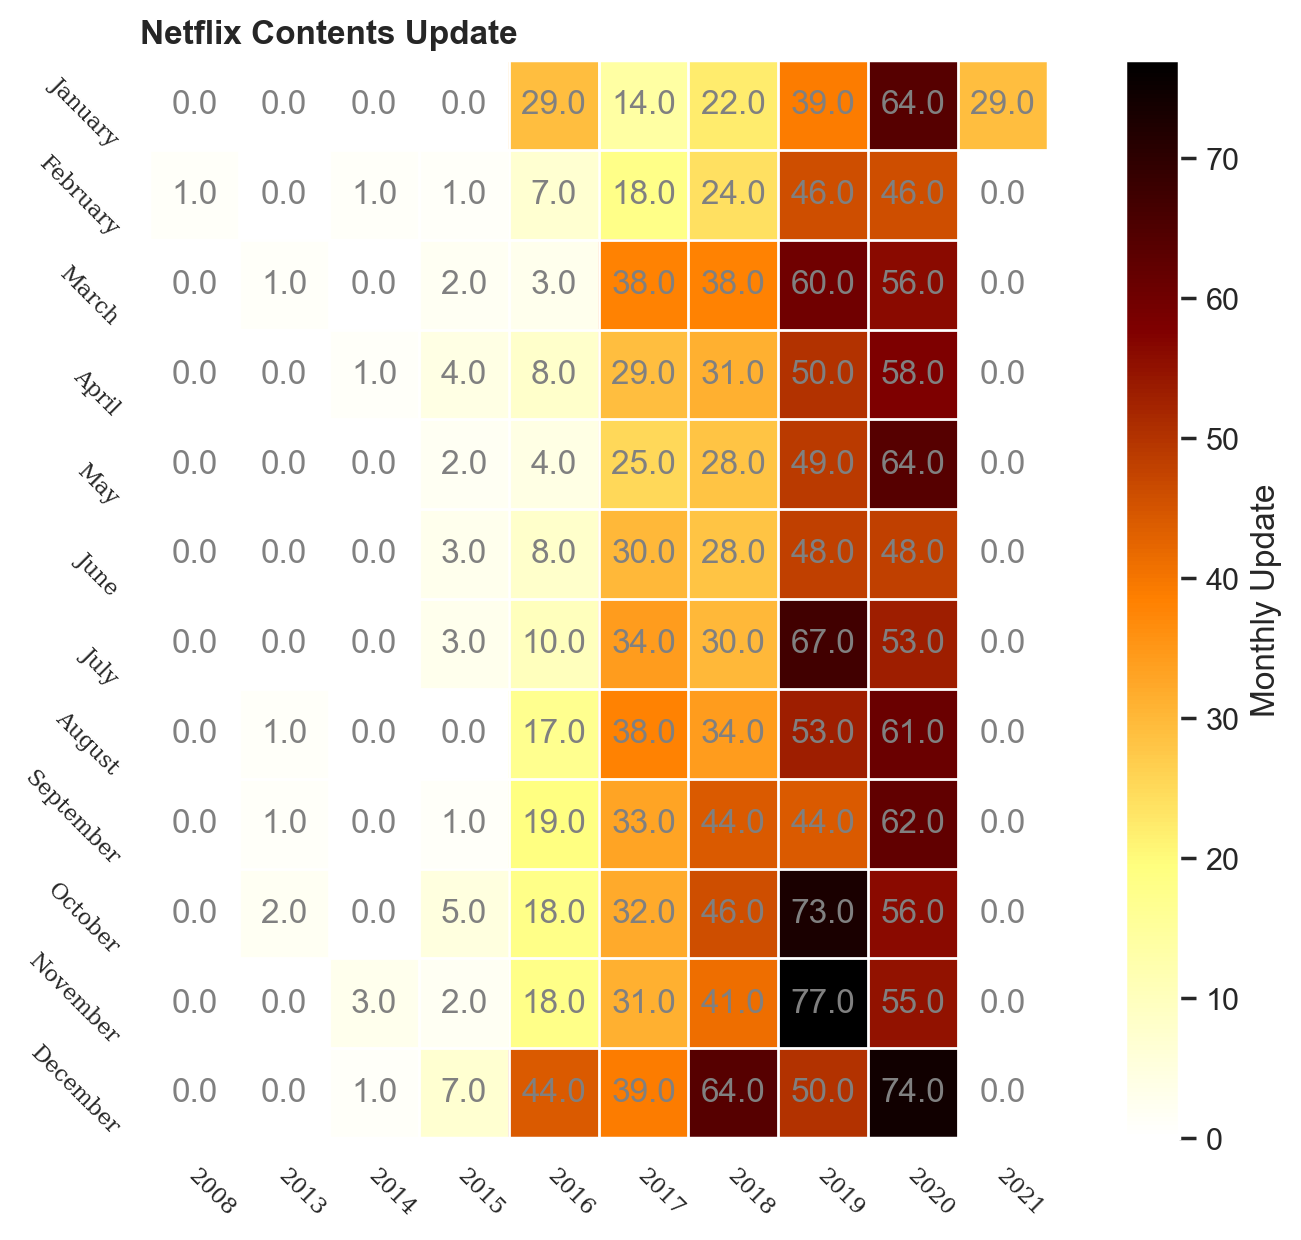

In [94]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

monthly_content = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
monthly_content

fig, ax = plt.subplots(figsize=(10, 7), dpi=200)
im = ax.imshow(monthly_content, cmap='afmhot_r')

# Loop over data dimensions and create text annotations.
for i in range(monthly_content.shape[0]):  # loop columns
    for j in range(monthly_content.shape[1]):    # loop rows
        text = ax.text(j, i, monthly_content.to_numpy()[i, j],
                       ha="center", va="center", color="grey")

plt.xticks(np.arange(0.5, len(monthly_content.columns), 1), monthly_content.columns, fontsize=3, fontfamily='serif', ha="right", rotation=315)
plt.yticks(np.arange(0.5, len(monthly_content.index), 1), monthly_content.index, fontsize=3, fontfamily='serif', va='bottom', rotation=315)

plt.title('Netflix Contents Update', fontsize=12, fontweight='bold', position=(0.20, 1.0+0.02))

ax.tick_params(labelsize=8) 
#cbar.ax.minorticks_on()
fig.colorbar(im, ax=ax, label='Monthly Update')

plt.show()

## TV Rating (Parental Guideline)

In [95]:
netflix_movies['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'PG', 'G', 'TV-Y7', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

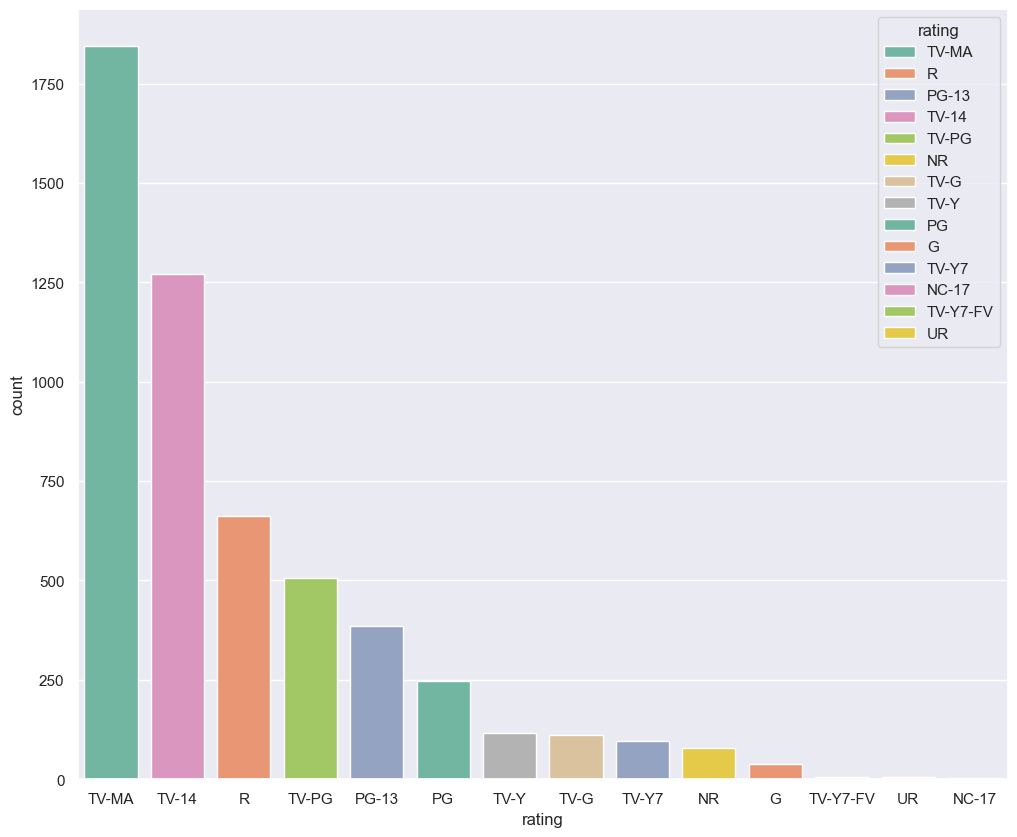

In [96]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set2", hue='rating',
                   order=netflix_movies['rating'].value_counts().index[0:15])

## IMDb rating and movie DF

In [97]:
imdb_ratings = pd.read_csv('IMDb_ratings.csv',usecols=['weighted_average_vote'])
imdb_titles = pd.read_csv('IMDb_movies.csv', usecols=['title','year','genre'],low_memory=False)
ratings = pd.DataFrame({'Title':imdb_titles.title,
                    'Release Year':imdb_titles.year,
                    'Rating': imdb_ratings.weighted_average_vote,
                    'Genre':imdb_titles.genre})
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
ratings.shape

(85852, 4)

In [98]:
ratings.dropna()
joint_data = ratings.merge(netflix_overall,left_on='Title',right_on='title',how='inner')
joint_data = joint_data.sort_values(by='Rating', ascending=False)

In [99]:
joint_data.sample(3)

Title Release Year  Rating                  Genre show_id  \
2448  White Chamber         2018     4.4  Drama, Horror, Sci-Fi   s7595   
2241          #Roxy         2018     5.0        Comedy, Romance     s35   
1238      Caregiver         2008     6.4                  Drama   s1217   

       type          title         director  \
2448  Movie  White Chamber     Paul Raschid   
2241  Movie          #Roxy  Michael Kennedy   
1238  Movie      Caregiver    Chito S. Roño   

                                                   cast         country  \
2448  Shauna MacDonald, Oded Fehr, Amrita Acharia, S...  United Kingdom   
2241  Jake Short, Sarah Fisher, Booboo Stewart, Dann...          Canada   
1238  Sharon Cuneta, John Estrada, John Manalo, Rica...     Philippines   

          date_added  release_year rating duration  \
2448  August 1, 2019          2018  TV-MA   89 min   
2241  April 10, 2019          2018  TV-14  105 min   
1238   March 5, 2019          2008  TV-14  131 min   

                         listed_in  \
2448   Sci-Fi & Fantasy, Thrillers   
2241     Comedies, Romantic Movies   
1238  Dramas, International Movies   

                                            description  
2448  When a civil war ravages the UK, a scientist a...  
2241  A teenage hacker with a huge nose helps a cool...  
1238  Sarah leaves her son in the Philippines to reu...

## Top rated 10 movies on Netflix

In [100]:
top_rated=joint_data[0:10]
fig =px.sunburst( top_rated, path=['title','country'], 
    values='Rating', color='Rating')
fig.show()

## Countries with highest rated content.

In [101]:
country_count=joint_data['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries

count
country                             
United States                    799
India                            701
United Kingdom                   107
Canada                            56
Philippines                       50
Spain                             40
South Korea                       36
Indonesia                         35
France                            33
United Kingdom, United States     31
Australia                         30

In [102]:
# Hong Kong people don't know IMDb much
country_count.loc[country_count.index=='Hong Kong']

count
country         
Hong Kong      8

## Movies released per year

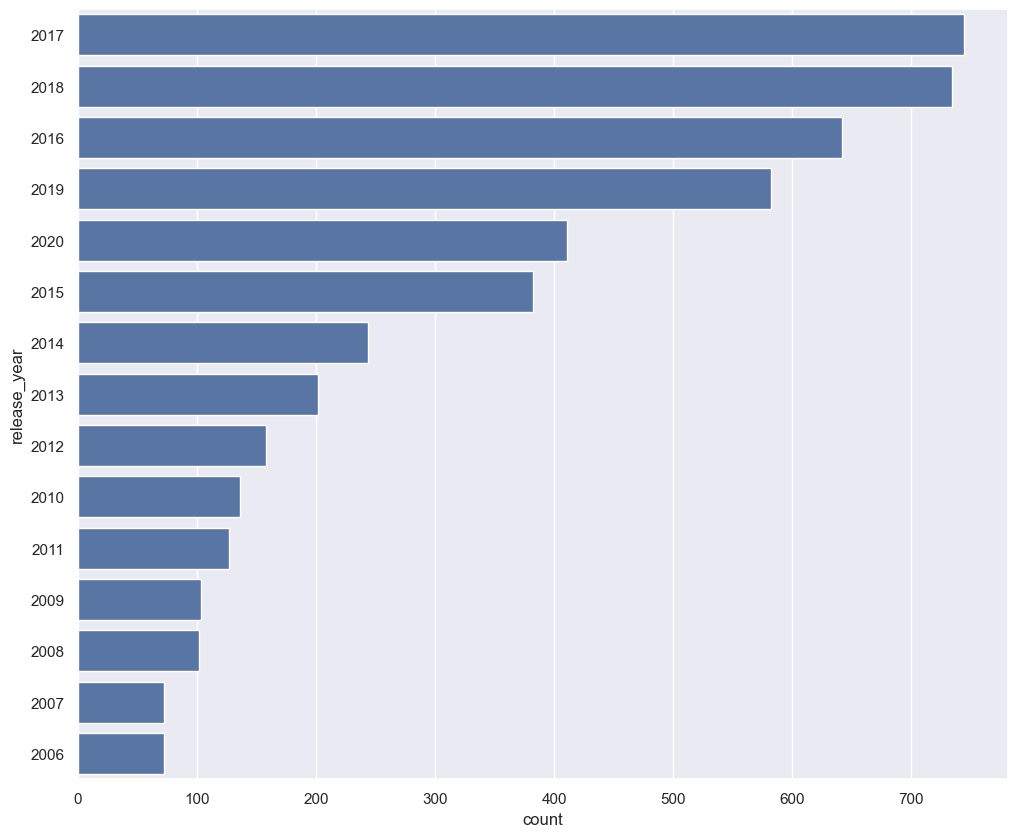

In [103]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_movies, #palette="Set2", hue='release_year',
                   order=netflix_movies['release_year'].value_counts().index[0:15])

## Film production countries

In [104]:
# some movie was filmed and produced in a few countries
netflix_movies['country'].sample(5)

3673              NaN
2552           Canada
3710    United States
3199    United States
3520           Brazil
Name: country, dtype: object

In [105]:
countries={}
netflix_movies.loc[netflix_movies.index, ['country']] = netflix_movies['country'].fillna('Unknown')
cou=list(netflix_movies['country'])
for i in cou:
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1

In [106]:
countries

{'Mexico': 1,
 'Singapore': 3,
 'United States': 1,
 'Egypt': 1,
 'India': 1,
 'Thailand': 1,
 'Nigeria': 1,
 'Norway': 2,
 ' Iceland': 4,
 ' United States': 331,
 'United Kingdom': 2,
 'South Korea': 1,
 'Italy': 1,
 'Canada': 3,
 'Indonesia': 1,
 'Romania': 3,
 'Spain': 1,
 'Turkey': 1,
 'Iceland': 1,
 'South Africa': 1,
 ' Nigeria': 5,
 'France': 4,
 ' South Africa': 14,
 'Portugal': 2,
 ' Spain': 39,
 'Unknown': 1,
 'Hong Kong': 1,
 ' China': 54,
 ' Singapore': 8,
 ' Germany': 89,
 'Argentina': 2,
 ' France': 128,
 ' Serbia': 4,
 'Germany': 3,
 'Denmark': 2,
 ' Poland': 9,
 'Poland': 1,
 'Japan': 2,
 'Kenya': 2,
 'New Zealand': 2,
 ' United Kingdom': 126,
 'Pakistan': 1,
 'Australia': 1,
 'China': 1,
 ' Hong Kong': 23,
 'Taiwan': 1,
 ' South Korea': 13,
 ' Japan': 28,
 ' Canada': 111,
 'Netherlands': 1,
 ' Denmark': 12,
 ' Netherlands': 17,
 'Philippines': 1,
 'United Arab Emirates': 2,
 'Brazil': 1,
 'Iran': 1,
 ' Belgium': 68,
 ' Brazil': 7,
 'Israel': 1,
 ' Mexico': 22,
 'Urugua

In [107]:
countries_fin = {}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no
        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

In [108]:
countries_fin

{'UnitedStates': 332,
 'France': 132,
 'UnitedKingdom': 128,
 'Canada': 114,
 'Germany': 92,
 'Belgium': 69,
 'China': 55,
 'Spain': 40,
 'India': 33,
 'Japan': 30,
 'Australia': 29,
 'Italy': 26,
 'HongKong': 24,
 'Mexico': 23,
 'Sweden': 22,
 'Netherlands': 18,
 'UnitedArabEmirates': 17,
 'Argentina': 16,
 'SouthAfrica': 15,
 'SouthKorea': 14,
 'Denmark': 14,
 'CzechRepublic': 14,
 'Switzerland': 12,
 'Singapore': 11,
 'Norway': 11,
 'Poland': 10,
 'Luxembourg': 10,
 'NewZealand': 9,
 'Ireland': 9,
 'Brazil': 8,
 'Chile': 8,
 'Russia': 8,
 'Greece': 8,
 'Serbia': 7,
 'Israel': 7,
 'Uruguay': 7,
 'Jordan': 7,
 'Finland': 7,
 'Lebanon': 7,
 'Qatar': 7,
 'Nigeria': 6,
 'Peru': 6,
 'Morocco': 6,
 'Egypt': 5,
 'Thailand': 5,
 'Iceland': 5,
 'Romania': 5,
 'Bulgaria': 5,
 'Colombia': 5,
 'Hungary': 5,
 'Indonesia': 4,
 'Portugal': 4,
 'Kenya': 4,
 'Taiwan': 4,
 'Philippines': 4,
 'Iran': 4,
 'Austria': 4,
 '': 4,
 'Cambodia': 4,
 'Turkey': 3,
 'Pakistan': 3,
 'SovietUnion': 3,
 'Malaysia':

## Top 10 Movie Production Countries

Text(0.5, 1.0, 'Top 10 Movie Production Countries')

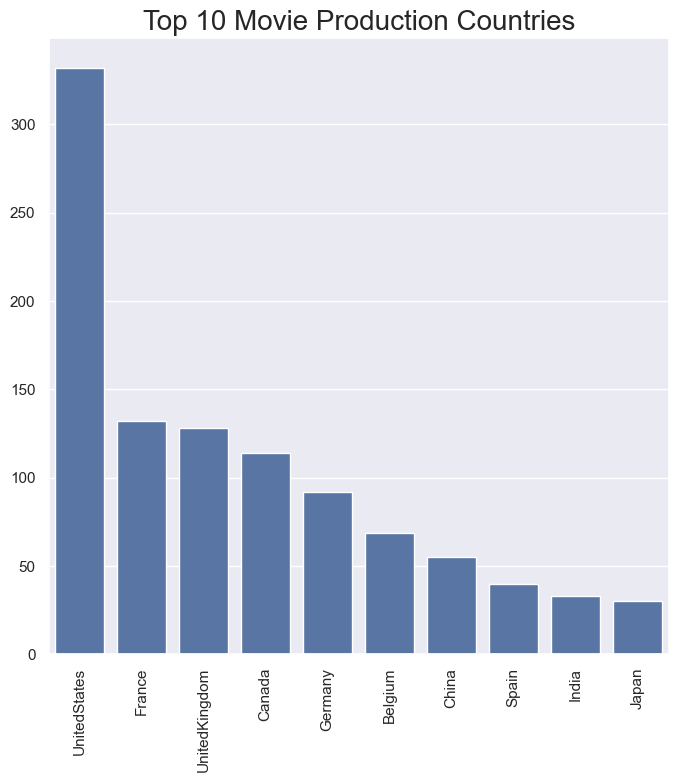

In [109]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(countries_fin.keys())[0:10], y=list(countries_fin.values())[0:10])
ax.xaxis.set_ticks(list(countries_fin.keys())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10], rotation = 90)
ax.set_title('Top 10 Movie Production Countries', fontsize=20)
#color = ['lightblue', 'lightgrey']

## Duration of movie

In [110]:
netflix_movies['duration']

1        93 min
2        78 min
3        80 min
4       123 min
6        95 min
         ...   
7781     88 min
7782     99 min
7783    111 min
7784     44 min
7786     90 min
Name: duration, Length: 5377, dtype: object

In [111]:
netflix_movies.loc[netflix_movies.index,['duration']] = netflix_movies['duration'].map(
                                                            lambda x: int(x.split("min")[0])) 
netflix_movies['duration']

1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5377, dtype: object

<Axes: xlabel='duration', ylabel='Density'>

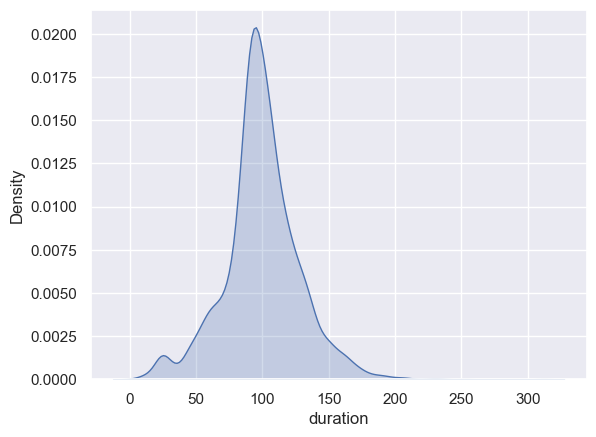

In [112]:
sns.set(style="darkgrid")
sns.kdeplot(data=netflix_movies['duration'], fill=True)

Text(0.5, 1.0, 'Genres')

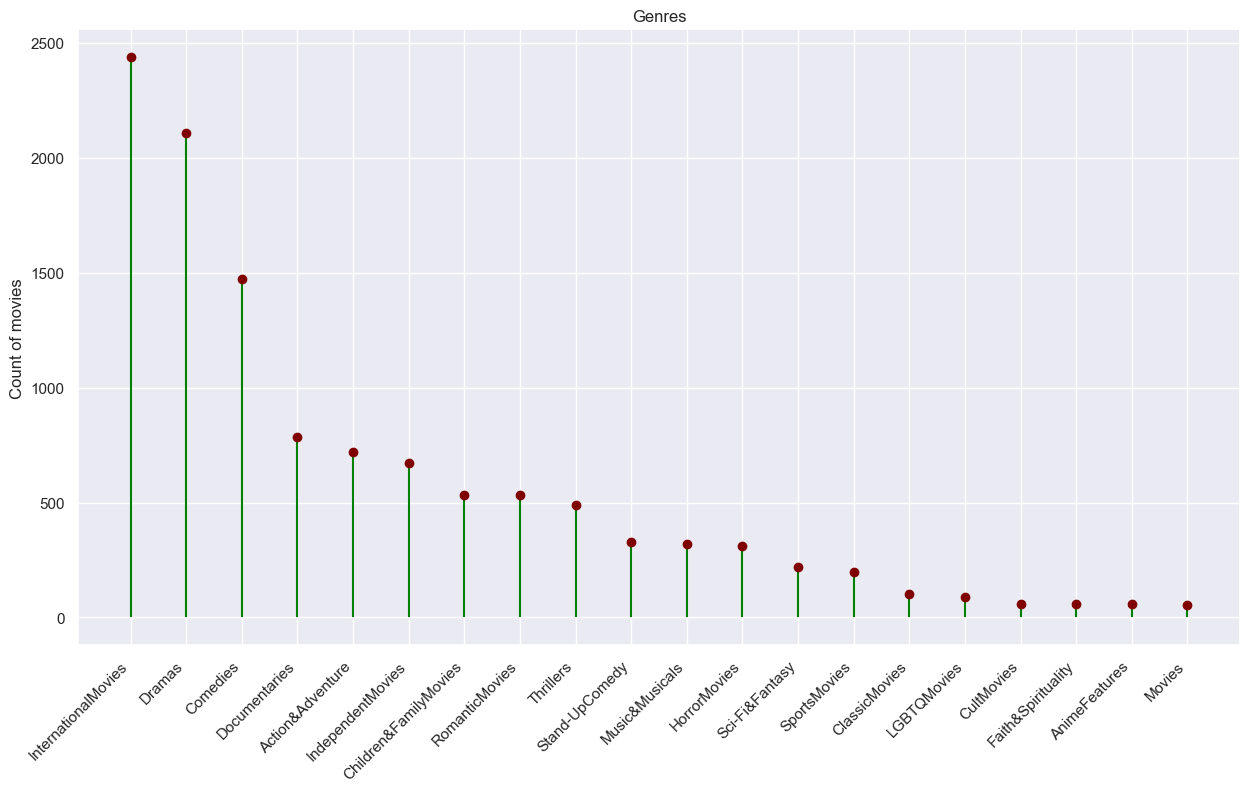

<Figure size 1000x1000 with 0 Axes>

In [113]:
from collections import Counter

genres=list(netflix_movies['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)
g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}

fig, ax = plt.subplots(figsize=(15,8))

fig = plt.figure(figsize = (10, 10))
x=list(g.keys())
y=list(g.values())
ax.vlines(x, ymin=0, ymax=y, color='green')
ax.plot(x,y, "o", color='maroon')
ax.xaxis.set_ticks(list(g.keys()))
ax.set_xticklabels(x, rotation=45, ha='right')
ax.set_ylabel("Count of movies")
# set a title
ax.set_title("Genres")

## Analysis of TV SERIES on Netflix

In [114]:
countries1={}
netflix_shows.loc[netflix_shows.index,['country']]=netflix_shows['country'].fillna('Unknown')
cou1=list(netflix_shows['country'])
for i in cou1:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries1.keys()):
            countries1[i]+=1
        else:
            countries1[i[0]]=1
    else:
        for j in i:
            if j in list(countries1.keys()):
                countries1[j]+=1
            else:
                countries1[j]=1

In [115]:
countries_fin1={}
for country,no in countries1.items():
    country=country.replace(' ','')
    if country in list(countries_fin1.keys()):
        countries_fin1[country]+=no
    else:
        countries_fin1[country]=no
        
countries_fin1={k: v for k, v in sorted(countries_fin1.items(), key=lambda item: item[1], reverse= True)}

Text(0, 0.5, 'Arrival delay (in minutes)')

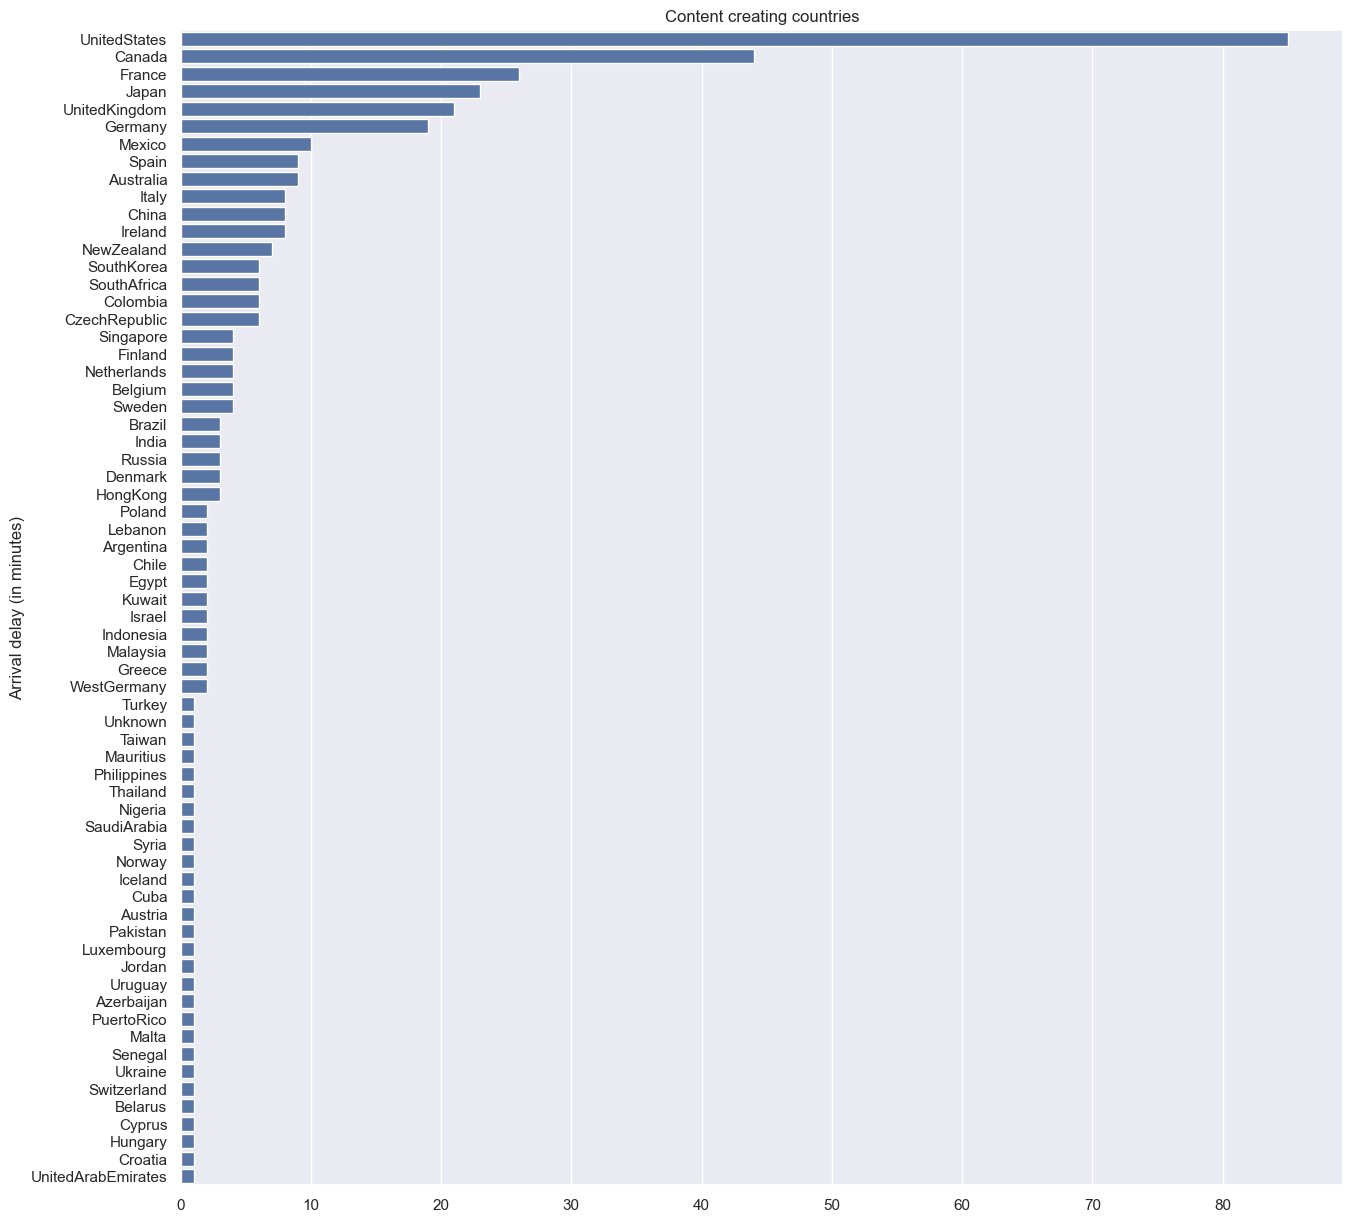

In [116]:
plt.figure(figsize=(15,15))
plt.title("Content creating countries")
sns.barplot(y=list(countries_fin1.keys()), x=list(countries_fin1.values()))
plt.ylabel("Arrival delay (in minutes)")

## TV shows with largest number of seasons

In [117]:
features=['title','duration']
durations = netflix_shows[features]
durations.loc[durations.index,['no_of_seasons']]=durations['duration'].str.replace(' Season','')
durations.loc[durations.index,['no_of_seasons']]=durations['no_of_seasons'].str.replace('s','')
durations.loc[durations.index,['no_of_seasons']]=durations['no_of_seasons'].astype(str).astype(int)

C:\Users\USER\AppData\Local\Temp\ipykernel_2124\968490180.py:3: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['4s', '1', '1', '1', '1', '2s', '1', '1', '1', '1', '1', '1', '1', '1', '4s', '3s', '1', '1', '1', '1', '1', '2s', '2s', '1', '1', '1', '1', '1', '1', '1', '1', '2s', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '3s', '1', '1', '1', '2s', '1', '2s', '1', '1', '1', '2s', '2s', '1', '1', '1', '1', '1', '1', '1', '1', '2s', '1', '1', '2s', '1', '1', '1', '1', '3s', '1', '2s', '1', '1', '1', '2s', '1', '1', '1', '1', '4s', '1', '1', '1', '1', '1', '2s', '1', '5s', '1', '1', '1', '5s', '2s', '2s', '1', '1', '2s', '3s', '1', '1', '9s', '1', '2s', '1', '1', '1', '1', '1', '3s', '1', '1', '1', '3s', '1', '1', '1', '1', '5s', '2s', '1', '1', '2s', '1', '2s', '2s', '1', '1', '1', '5s', '8s', '1', '3s', '1', '1', '3s', '1', '1', '1', '1', '1', '3s', '1', '1', '1', '3s', '1', '1', '1', '1', '2s', '3s',

<Axes: xlabel='title'>

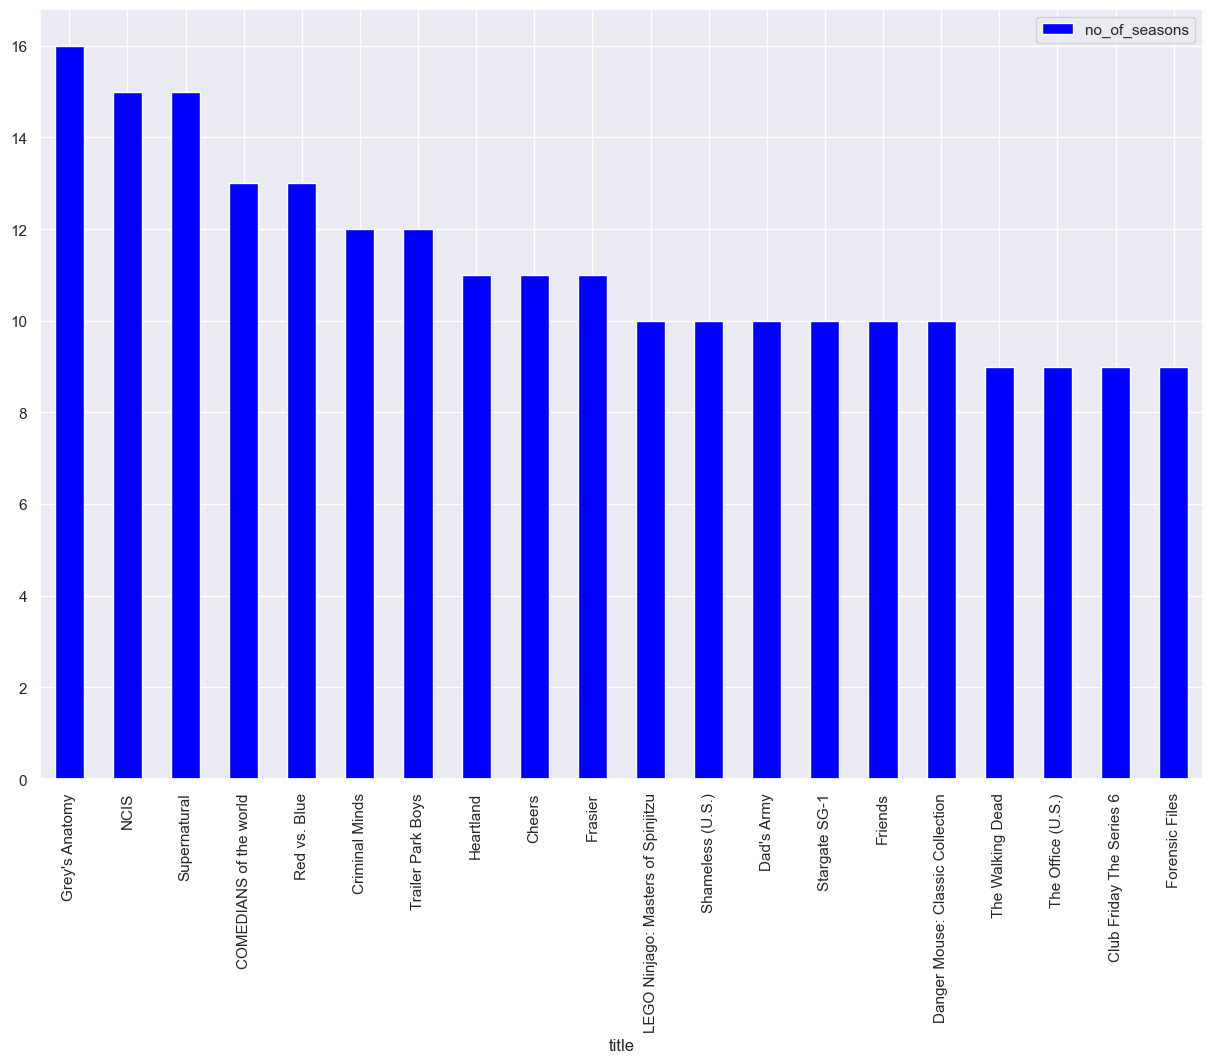

In [118]:
t=['title','no_of_seasons']
top=durations[t]
top=top.sort_values(by='no_of_seasons', ascending=False)
top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='blue',figsize=(15,10))

## Lowest number of seasons

In [119]:
bottom=top.sort_values(by='no_of_seasons')
bottom=bottom[20:50]

In [120]:
bottom

title no_of_seasons
5101                                     Rapture             1
5186                            Revolting Rhymes             1
3340              Kevin Hart: Don’t F**k This Up             1
3386  Killer Inside: The Mind of Aaron Hernandez             1
3379                                Kill la Kill             1
1882                   Drug Squad: Costa del Sol             1
3370                                  Kid-E-Cats             1
3368                        Kicko & Super Speedo             1
1883                                 Drugs, Inc.             1
3360                               Khotey Sikkey             1
3355            Khelti Hai Zindagi Aankh Micholi             1
3354                    Khan: No. 1 Crime Hunter             1
3352                                      Khaani             1
1890                          Dueños del paraíso             1
3472                         Kuroko's Basketball             1
3463                      Kulipari: Dream Walker             1
3462                  Kulipari: An Army of Frogs             1
3454                              Krishna Balram             1
3126                   Japanese Style Originator             1
3125                           Japan Sinks: 2020             1
1947                                 El Cartel 2             1
3119                Jamtara - Sabka Number Ayega             1
3118                   James Acaster: Repertoire             1
3113                                   Jailbirds             1
1949                                    El Chavo             1
3098                                 Jack Taylor             1
3090                                J-Style Trip             1
3088                          Izzy's Koala World             1
3083                               Itaewon Class             1
3147            Jenni Rivera: Mariposa de Barrio             1

## Content in Hong Kong

In [121]:
netflix_hk = netflix_overall[netflix_overall['country']=='Hong Kong']
nfhk = netflix_hk.dropna()

fig = px.treemap(nfhk, path=['country','director'],
                  color='director', hover_data=['director','title'],
                 color_continuous_scale='Purples')
fig.show()

In [122]:
newest_HK_series = netflix_hk.sort_values(by='release_year', ascending=False)[0:20]
newest_HK_series

show_id     type                          title  \
187     s188    Movie             A Home with A View   
5528   s5529  TV Show                   Sexy Central   
7497   s7498    Movie                 We Are Legends   
2797   s2798  TV Show    Hong Kong West Side Stories   
4566   s4567  TV Show                           OCTB   
3513   s3514    Movie                Lady Bloodfight   
3841   s3842    Movie                      Mad World   
1876   s1877    Movie              Drink Drank Drunk   
7521   s7522    Movie                  Weeds on Fire   
6021   s6022    Movie                      Ten Years   
1087   s1088    Movie                   Break Up 100   
3996   s3997    Movie                    May We Chat   
6663   s6664    Movie                The Midas Touch   
5445   s5446    Movie           SDU: Sex Duties Unit   
1816   s1817    Movie     Don't Go Breaking My Heart   
3757   s3758    Movie                 Love In A Puff   
4620   s4621    Movie                Once a Gangster   
3716   s3717    Movie                Look for a Star   
423     s424    Movie  All's Well, End's Well (2009)   
293     s294    Movie                       Accident   

                                               director  \
187                                          Herman Yau   
5528                                                NaN   
7497                               Daniel Yee Heng Chan   
2797                                                NaN   
4566                                                NaN   
3513                                        Chris Nahon   
3841                                          Chun Wong   
1876                                      Yeung Yat-Tak   
7521                                       Chi Fat Chan   
6021  Jevons Au, Zune Kwok, Chow Kwun-wai, Ng Ka-Leu...   
1087                                     Lawrence Cheng   
3996                                        Philip Yung   
6663                                     Chi Keung Fung   
5445                                           Gary Mak   
1816                                         Johnnie To   
3757                                     Pang Ho-cheung   
4620                                        Felix Chong   
3716                               Andrew Lau Wai-Keung   
423                                         Vincent Kok   
293                                      Cheang Pou Soi   

                                                   cast    country  \
187   Francis Chun-Yu Ng, Louis Koo, Anita Yuen, Tat...  Hong Kong   
5528  Jeana Ho Pui-yu, Joyce Cheng, Ava Liu, Shiga L...  Hong Kong   
7497  Lam Yiu-sing, Ma Chi Wai, Wiyona Yeung, Eric K...  Hong Kong   
2797  Louis Cheung, Myolie Wu, Justin Cheung, Brian ...  Hong Kong   
4566  Jordan Chan, Justin Cheung, Kwok-Kwan Chan, Sa...  Hong Kong   
3513  Amy Johnston, Muriel Hofmann, Jenny Wu, Kathy ...  Hong Kong   
3841  Shawn Yue, Eric Tsang, Elaine Jin, Charmaine Fong  Hong Kong   
1876  Carlos Chan, Ken Hung, Deep Ng, Michelle Wai, ...  Hong Kong   
7521  Liu Kai Chi, Lam Yiu-sing, Tony Tsz-Tung Wu, P...  Hong Kong   
6021              Wong Jing, Lau Ho-Chi, Leung Kin-Ping  Hong Kong   
1087  Ekin Cheng, Chrissie Chow, Ivana Wong, Jase Ho...  Hong Kong   
3996  Irene Wan, Peter Mak, Rainky Wai, Heidi Lee, K...  Hong Kong   
6663  Chapman To, Charlene Choi, Gao Yunxiang, Shati...  Hong Kong   
5445  Chapman To, Shawn Yue, Matt Chow, Kwok Cheung ...  Hong Kong   
1816                 Louis Koo, Gao Yuanyuan, Daniel Wu  Hong Kong   
3757  Miriam Chin Wah Yeung, Shawn Yue, Singh Hartih...  Hong Kong   
4620  Ekin Cheng, Jordan Chan, Alex Fong, Michelle Y...  Hong Kong   
3716  Andy Lau, Qi Shu, Zhang Hanyu, Denise Ho, Domi...  Hong Kong   
423   Louis Koo, Sandra Ng Kwan Yue, Raymond Wong, R...  Hong Kong   
293   Louis Koo, Richie Ren, Stanley Fung Sui-Fan, M...  Hong Kong   

              date_added  release_year rating  duration  \
187       April 30, 2019          2019  TV-MA    92 min   

## Latest release

In [123]:
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year']),
                 cells=dict(values=[newest_HK_series['title'],newest_HK_series['release_year']]))
                     ])
fig.show()